
# Python DS-ao-Dev

## Bussiness Problem

**Star Jeans Company**

- Eduardo e Marcelo são dois brasileiros, amigos e sócios de empreendimento. Depois de vários negócio bem sucedidos, eles estão planejando entrar no mercado de moda dos USA como um modelo de negócio do tipo E-commerce.

- A idéia inicial é entrar no mercado com apenas um produto e para um público específico, no caso o produto seria calças Jenas para o público masculino. O objetivo é manter o custo de operação baixo e escalar a medida que forem conseguindo clientes.

- Porém, mesmo com o produto de entrada e a audiência definidos, os dois sócios não tem experiência nesse mercado de moda e portanto não sabem definir coisas básicas como preço, o tipo de calça e o material para a fabricação de cada peça.

- Assim, os dois sócios contrataram uma consultoria de Ciência de Dados para responder as seguintes perguntas: ]
    1. Qual o melhor preço de venda para as calças? 
    2. Quantos tipos de calças e suas cores para o produto inicial? 
    3. Quais as matérias-prima necessárias para confeccionar as calças?
    
- As principais concorrentes da empresa Start Jeans são as americadas H&M e Macys.

## Solution Planning (Input-Output-Tasks)

**Bussiness Question**

- Which is the best price for jeans?

1. Input:
    1. Fonte de dados
        - Site da H&M: https://www2.hm.com/en_us/men/products/jeans.html
        - Site da Macys: https://www.macys.com/shop/mens-clothing/mens-jeans
    2. Ferramentas
        - Python 3.8.0
        - Bibliotecas de Webscrapping ( BS4, Selenium )
        - PyCharm
        - Jupyter Notebook ( Analise e prototipagens )
        - Crontjob, Airflow
        - Streamlit
    
2. Output:
    1. A resposta para a pergunta.
        - Mediana dos preços dos concorrents.
    2. Formato da entrega
        - Tabela ou gráfico
    3. Local da entrega
        - App Streamlit
    
3. Tasks:
    1. Passo a passso para construir o cálculo da mediana ou média
        - Realizar o calculo da mediana sobre o produto, tipo e cor
    2. Definir o formato da entrega ( Visualização, Tabela, Frase )
        - Gráfico de barras com a mediana dos preço dos produtos, por tipo e cor dos últimos 30 dia
        - Tabela com as seguintes colunas: id | product_name | product_type | product_color | produ
        - Definição do schema: Colunas e seu tipo
        - Definição a infraestrutura de armazenamento ( SQLITE3 )
        - Design do ETL ( Scripts de Extração, Transformação e Carga )
        - Planejamento de Agendamento dos scripts ( dependencias entre os scripts )
        - Fazer as visualizações
        - Entrega do produto final
    3. Decidir o local de entrega ( PowerBi, Telegram, Email, Streamlit, Intranet ),
        - App com Streamlit

## Bussiness Models

“Como você planeja ganhar dinheiro”, Michael Lewis

“Um modelo de negócio descreve a lógica de criação, entrega e captura de valor por
parte de uma organização”, Alexander Osterwalder

- E-commerce:
    1. Faturamento: Vendas de um produto.
    2. Exemplo: Lojas Riachuelo, Submarino, Magazine Luiza, etc
        
- Software AS a Service ( SaaS ):
    1. Faturamento: Assinatura mensal/anual de utilização ou por usuário.
    2. Exemplo: Looker, Asana, Gmail, Salesforce.
    
- Serviço:
    1. Faturamento: Prestação de serviço por tempo ou projeto.
    2. Exemplo: Sul América, Porto Seguro, Mapfre.
    
- Mobile App:
    1. Faturamento: Venda de upgrades.
    2. Exemplo: Wildlife, Ubisoft, Games Mobile.
    
- Media Site:
    1. Faturamento: Cobrança por clicks ou visualizações de um determinado anúncio.
    2. Exemplo: Facebook, Google, UOL, G1, etc.
    
- Marketplace:
    1. Faturamento: Taxa sobre a transação entre o passageiro e o motorista.
    2. Exemplo: Uber, Ifood, 99, Elo7, Submarino.

## E-commerce Metrics

- **Growth Metrics**:
    1. Porcentagem do Marketshare
    2. Número de Clientes Novos
- **Revenue Metrics**:
    1. Número de Vendas
    2. Ticket Médio
    3. LTV ( Long Time Value )
    4. Recência Média
    5. Basket Size Médio
    6. Markup médio
- **Cost Metrics**:
    1. CAC ( Custo de aquisição de Clientes )
    2. Desconto médio
    3. Custo de Produção
    4. Taxa de devolução
    5. Custos Fixos ( Folha de pagamento, escritório, softwares )
    6. Impostos

#Ecommerce Products Trees#

Style ID
    -> Product ID
    -> Color ID
    -> SKU
    
Style ID -> Jeans Slim (tipo da roupa da categoria)
    Style ID + Color ID -> Product ID (estilo mais a cor)
    Style ID + Color ID + Size ID -> SKU (Granularidade mínima de um ecommerce) (estilo+cor+tamanho)

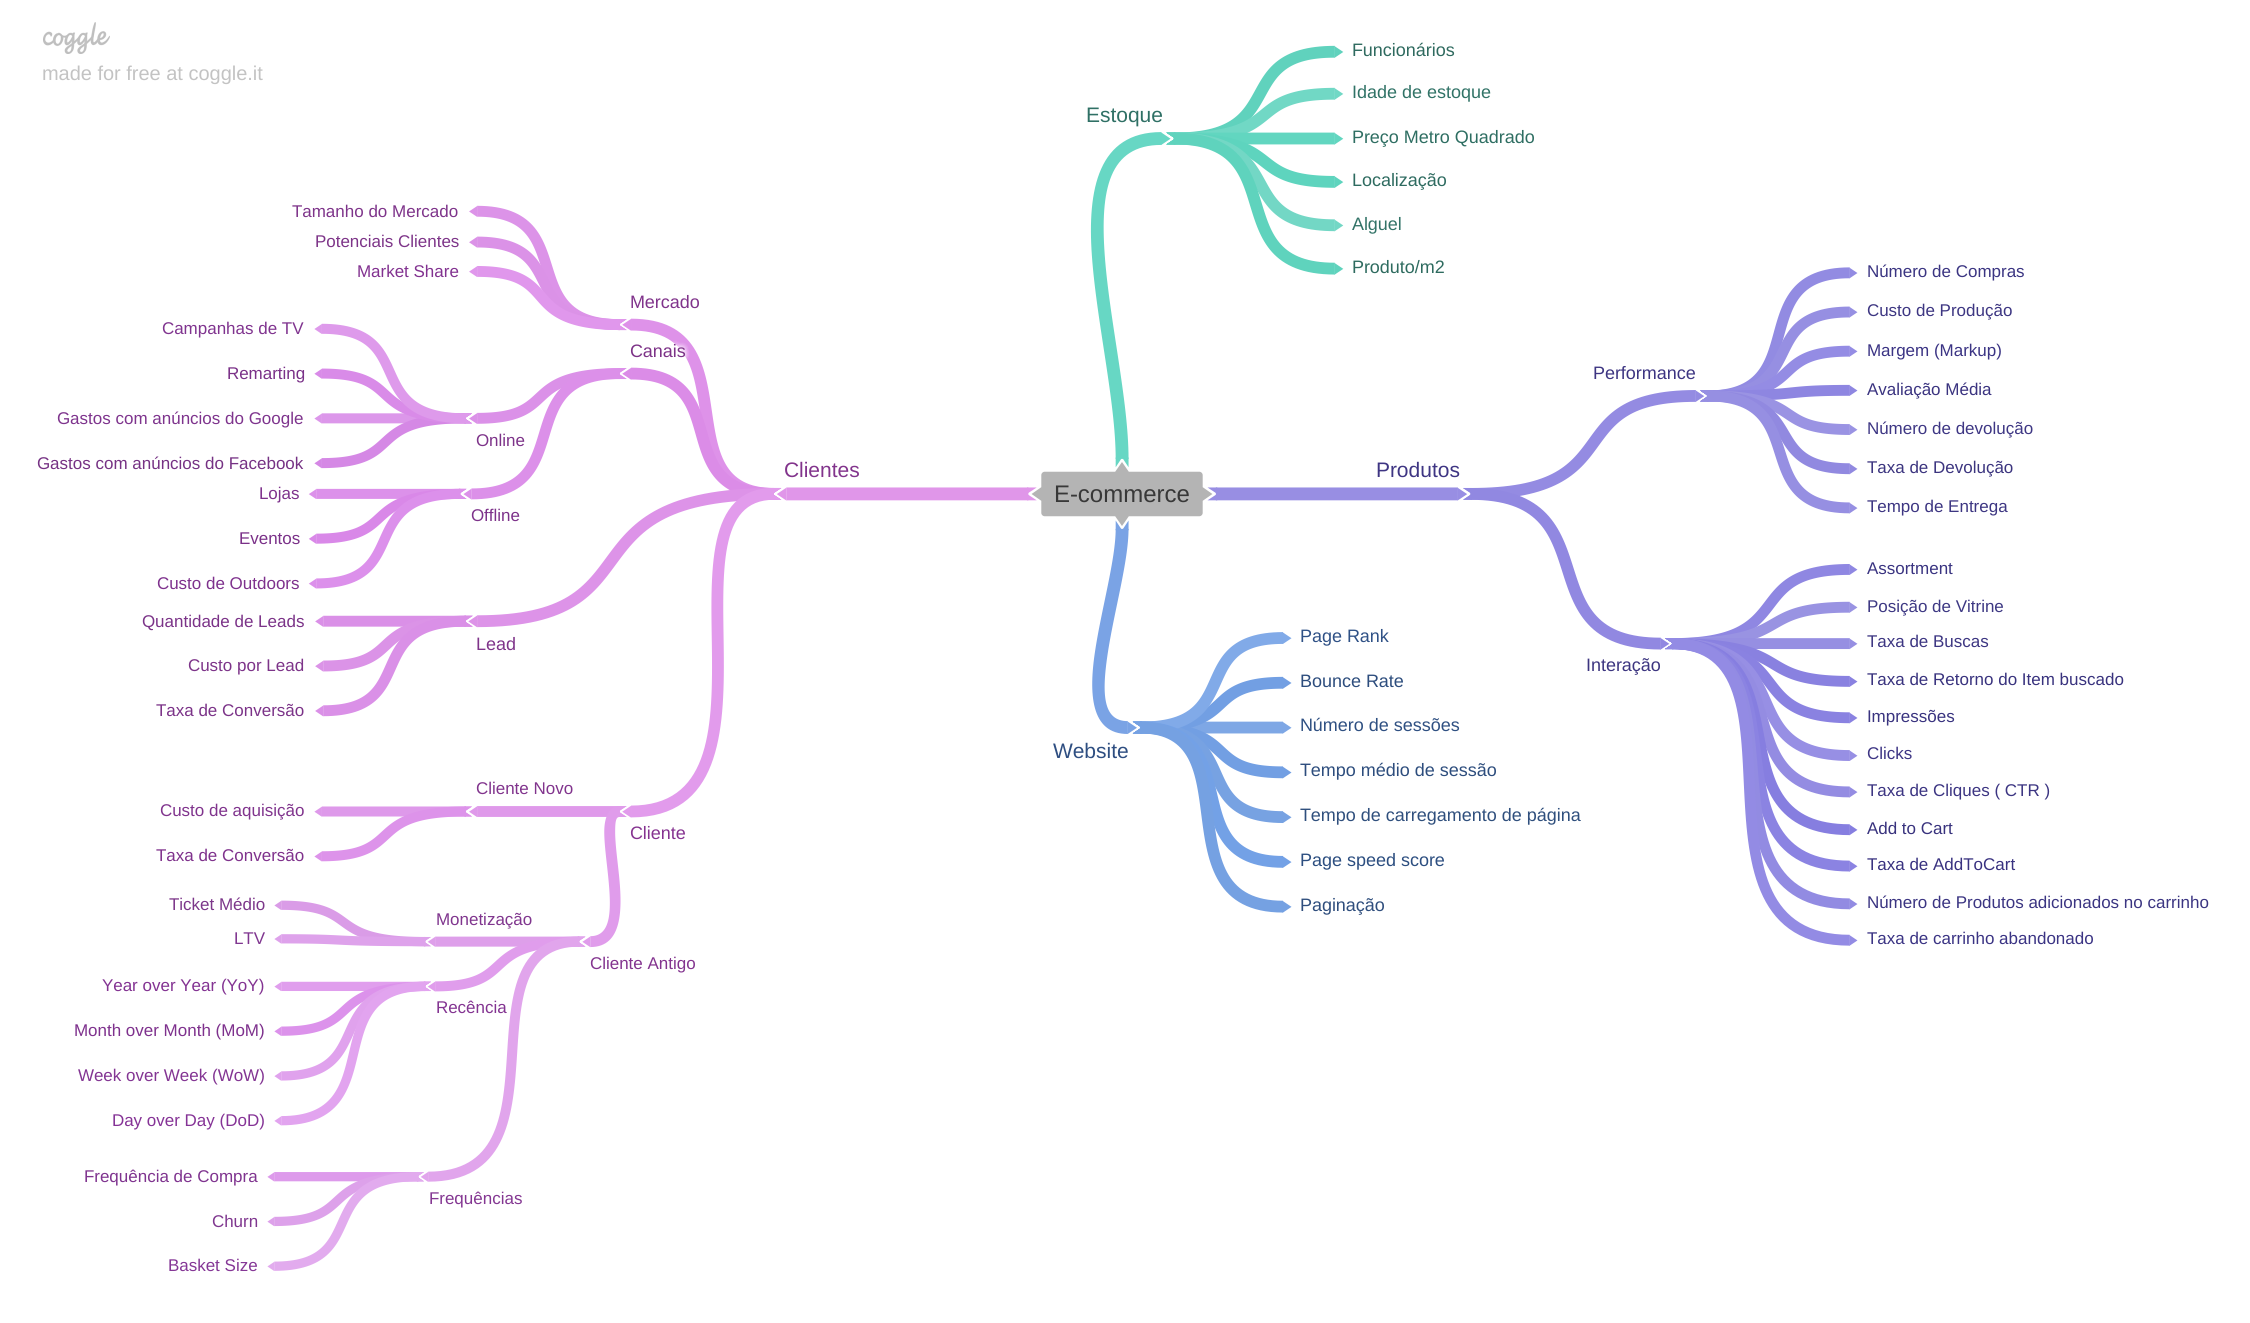

In [2]:
from IPython.display import Image
Image(filename='/home/marxcerqueira/repos/Data-Science-Projects/pa005_insiders_clustering/pa005_marx_cerqueira/reports/figures/mapa_metricas_e_commerce.png')

## O QUE É UMA API?

Application Programming Interface

é uma classe com alguns métodos (contratos), estabelece o que a função vai receber e vai entregar como resultado

1. é um software intermediário que permite com que duas aplicações troquem mensagens entre si.
2. é uma forma de comunicação entre dois sistemas
3. é uma forma de fornecer um produto/serviço sem expor todo o desenvolvimento interno

requisições:

são pedidos para a API onde o requisitante fornece dados de entrada e recebe um objeto como saída.Os pedidos são feitos através dos métodos implementados na API


paginação:

    quando uma api tem um limite especifico de retorno de html, principalmente em pagina de produtos.
    
    ao tentar extrair grandes volumes, pode travar a API, por isso ela limita quantidade de produtos por paginas.
    
    
 atributos html
 
     page size é o tamanho da vitrine naquele momento
     offset para começar no produto X

# Imports

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

from bs4 import BeautifulSoup
import requests

# Loading Data (Web Scrapping)

## Beautiful Soup - Pratica I

In [ ]:
# Preciso extrair:
    # id
    # product_name
    # product_type
    # product_color
    # composition
    # priceb

In [35]:
url = 'https://www2.hm.com/en_us/men/products/jeans.html'

headers = {'user-agent': 'my-app/0.0.1'}
page = requests.get(url, headers = headers)

In [36]:
soup = BeautifulSoup(page.text, 'html.parser')

In [37]:
#website showcase
products = soup.find('ul', class_= 'products-listing small') #find retorna apenas 1 elemento, pois temos apenas 1 UL, uma vitrine, find_all retorna lista

In [38]:
#quantidade de produtos por vitrine (1 pag)
product_list = products.find_all('article', class_= 'hm-product-item')
len(product_list)

36

In [39]:
#teste product_id
product_list[4].get('data-articlecode')

'0985197004'

In [40]:
#list comprehension to get all products id and products category from the first page of 
product_list = products.find_all('article', class_ = 'hm-product-item')

# product id
product_id = [p.get('data-articlecode') for p in product_list]

# product_category
product_category = [p.get('data-category') for p in product_list]

In [41]:
# product name
product_list = products.find_all('a', class_ = 'link')
product_name = [p.get_text() for p in product_list]

In [42]:
#price
product_list = soup.find_all('span', class_ = 'price regular')
product_price = [p.get_text() for p in product_list]

In [ ]:
# product color

In [ ]:
# product composition

In [46]:
data = pd.DataFrame([product_id, product_category, product_name, product_price]).T
data.columns = ['product_id', 'product_category', 'product_name', 'product_price']

#scrapy time 
data['scrapy_datetime'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
data.head()

,product_id,product_category,product_name,product_price,scrapy_datetime
0,0985197001,men_jeans_slim,Slim Jeans,$ 19.99,2021-12-13 13:18:24
1,0690449043,men_jeans_ripped,Skinny Jeans,$ 39.99,2021-12-13 13:18:24
2,0690449051,men_jeans_ripped,Skinny Jeans,$ 39.99,2021-12-13 13:18:24
3,0751994034,men_jeans_slim,Slim Jeans,$ 29.99,2021-12-13 13:18:24
4,0985197004,men_jeans_slim,Slim Jeans,$ 19.99,2021-12-13 13:18:24


## Beautiful Soup - Pratica II

In [19]:
url = 'https://www2.hm.com/en_us/men/products/jeans.html'

headers = {'user-agent': 'my-app/0.0.1'}

page = requests.get(url, headers = headers)

In [20]:
soup = BeautifulSoup(page.text, 'html.parser')

In [21]:
# get all the items
total_item = soup.find_all('h2', class_ = 'load-more-heading')[0].get('data-total')
total_item

'79'

In [22]:
# get the page number (paginação)
page_number = np.ceil(int(total_item)/36) #np.ceil rounds up the number
page_number

3.0

In [23]:
url02 = url + '?page-size=' + str(int(page_number*36))
url02

'https://www2.hm.com/en_us/men/products/jeans.html?page-size=108'

## Beautiful Soup - Pratica III

### One product - Web scraping color and composition for one product

In [24]:
#API request
url = 'https://www2.hm.com/en_us/productpage.0636207010.html'

headers = {'user-agent': 'my-app/0.0.1'}
page = requests.get(url, headers = headers)

# BeatifulSoup object
soup = BeautifulSoup(page.text, 'html.parser')

## ================ color name dataframe =============
# color name
product_list = soup.find_all('a', class_ = 'filter-option miniature')
color_name = [p.get('data-color') for p in product_list]

#product id
product_id = [p.get('data-articlecode') for p in product_list]

df_color = pd.DataFrame([product_id, color_name]).T
df_color.columns = ['product_id', 'color_name']

#merge 2 dataframes by style
## the merge was done by style because the granularity, one style has different compositions and colors

#create style_id and color_id
df_color['style_id'] = df_color['product_id'].apply(lambda x: x[:-3] )
df_color['color_id'] = df_color['product_id'].apply(lambda x: x[-3:])

## ================ composition dataframe =============
#composition
product_composition_list = soup.find_all('div', class_ = 'pdp-description-list-item')
product_composition = [list(filter(None, p.get_text().split('\n')) )for p in product_composition_list]

#rename dataframe
df_composition = pd.DataFrame(product_composition).T
df_composition.columns = df_composition.iloc[0]

#delete first row and filling None values with method ffill which replaces the none values with the previous row data
df_composition = df_composition.iloc[1:].fillna(method = 'ffill')

#merge 2 dataframes by style
## the merge was done by style because the granularity, one style has different compositions and colors

#create style_id and color_id
df_composition['style_id'] = df_composition['Art. No.'].apply(lambda x: x[:-3] )
df_composition['color_id'] = df_composition['Art. No.'].apply(lambda x: x[-3:])

#merge dataframes color + composition
data_sku = pd.merge(df_color, df_composition[['style_id','Fit', 'Composition']], how = 'left', on = 'style_id')

In [25]:
data_sku

,product_id,color_name,style_id,color_id,Fit,Composition
0,0636207001,Dark denim blue,0636207,001,Slim fit,"Cotton 88%, Polyester 10%, Spandex 2%"
1,0636207001,Dark denim blue,0636207,001,Slim fit,Pocket lining: Cotton 100%
2,0636207002,Dark gray denim,0636207,002,Slim fit,"Cotton 88%, Polyester 10%, Spandex 2%"
3,0636207002,Dark gray denim,0636207,002,Slim fit,Pocket lining: Cotton 100%
4,0636207004,Denim blue,0636207,004,Slim fit,"Cotton 88%, Polyester 10%, Spandex 2%"
5,0636207004,Denim blue,0636207,004,Slim fit,Pocket lining: Cotton 100%
6,0636207005,Gray,0636207,005,Slim fit,"Cotton 88%, Polyester 10%, Spandex 2%"
7,0636207005,Gray,0636207,005,Slim fit,Pocket lining: Cotton 100%
8,0636207006,Black,0636207,006,Slim fit,"Cotton 88%, Polyester 10%, Spandex 2%"
9,0636207006,Black,0636207,006,Slim fit,Pocket lining: Cotton 100%


In [17]:
df_composition

,Fit,Composition,Art. No.,style_id,color_id
1,Slim fit,"Cotton 88%, Polyester 10%, Spandex 2%",0636207010,0636207,010
2,Slim fit,Pocket lining: Cotton 100%,0636207010,0636207,010


In [19]:
df_color

,product_id,color_name,style_id,color_id
0,0636207001,Dark denim blue,0636207,001
1,0636207002,Dark gray denim,0636207,002
2,0636207004,Denim blue,0636207,004
3,0636207005,Gray,0636207,005
4,0636207006,Black,0636207,006
5,0636207011,Midnight blue,0636207,011
6,0636207014,Dark gray,0636207,014
7,0636207015,Denim blue,0636207,015
8,0636207017,White,0636207,017
9,0636207019,Pale denim blue,0636207,019


### Multiple product

In [48]:
headers = {'user-agent': 'my-app/0.0.1'}

#empty dataframe
df_details = pd.DataFrame()

# unique columns for all products
aux = []

cols = ['Art. No.', 'Composition', 'Fit', 'Product safety', 'Size']
df_pattern = pd.DataFrame(columns = cols)

In [37]:
df_pattern

,Art. No.,Composition,Fit,Product safety,Size


In [ ]:
data_raw

In [50]:
aux = aux + df_composition.columns.tolist()
aux

['Fit',
 'Composition',
 'Art. No.',
 'style_id',
 'color_id',
 'Fit',
 'Composition',
 'Art. No.',
 'style_id',
 'color_id']

In [51]:
for i in range(len(data)):
    # API Request
    url = 'https://www2.hm.com/en_us/productpage.' + data.loc[i, 'product_id'] + '.html'
    page = requests.get(url, headers = headers)
    
    # Beautiful Soup object
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # ==================== color name =================================
    # color name
    product_list = soup.find_all( 'a', class_='filter-option miniature' )
    color_name = [p.get( 'data-color' ) for p in product_list]
    
    # product id
    product_id = [p.get( 'data-articlecode' ) for p in product_list]
    
    df_color = pd.DataFrame( [product_id, color_name] ).T
    df_color.columns = ['product_id', 'color_name']
    
    # generate style id + color id
    df_color['style_id'] = df_color['product_id'].apply( lambda x: x[:-3] )
    df_color['color_id'] = df_color['product_id'].apply( lambda x: x[-3:] )
    
    # ==================== composition =================================
    product_composition_list = soup.find_all( 'div', class_='pdp-description-list-item' )
    product_composition = [list( filter( None, p.get_text().split( '\n' ) ) ) for p in product_composition_list]
    
    # rename dataframe
    df_composition = pd.DataFrame(product_composition).T
    df_composition.columns = df_composition.iloc[0]
    
    # delete first row
    df_composition = df_composition.iloc[1:].fillna(method = 'ffill')
    
    # garantee the same number of columns
    df_composition = pd.concat( [df_pattern, df_composition], axis=0 )
    
    # generate style id + color id
    df_composition['style_id'] = df_composition['Art. No.'].apply(lambda x: x[:-3])
    df_composition['color_id'] = df_composition['Art. No.'].apply(lambda x: x[-3:])
    
    aux = aux + df_composition.columns.tolist() #to guarantee we have all columns of composition unique values
    
    # merge data color + composition
    
    data_sku = pd.merge( df_color, df_composition[['style_id','Fit','Composition', 'Size','Product safety']], how = 'left', on = 'style_id')
    
    # all details products
    df_details = pd.concat([df_details, data_sku], axis = 0)
    
# Join Showroom data + details
data['style_id'] = data['product_id'].apply( lambda x: x[:-3] )
data['color_id'] = data['product_id'].apply( lambda x: x[-3:] )

data_raw = pd.merge( data, df_details[['style_id','color_name','Fit','Composition', 'Size','Product safety']], how = 'left', on = 'style_id')

In [52]:
df_details.head()

,product_id,color_name,style_id,color_id,Fit,Composition,Size,Product safety
0,0985197002,Midnight blue,0985197,002,Slim fit,Pocket lining: Cotton 100%,"The model is 189cm/6'2"" and wears a size 32/32",NaN
1,0985197002,Midnight blue,0985197,002,Slim fit,"Shell: Cotton 98%, Spandex 2%","The model is 189cm/6'2"" and wears a size 32/32",NaN
2,0985197003,Denim blue,0985197,003,Slim fit,Pocket lining: Cotton 100%,"The model is 189cm/6'2"" and wears a size 32/32",NaN
3,0985197003,Denim blue,0985197,003,Slim fit,"Shell: Cotton 98%, Spandex 2%","The model is 189cm/6'2"" and wears a size 32/32",NaN
4,0985197004,Dark denim blue,0985197,004,Slim fit,Pocket lining: Cotton 100%,"The model is 189cm/6'2"" and wears a size 32/32",NaN


In [53]:
data_raw.head()

,product_id,product_category,product_name,product_price,scrapy_datetime,style_id,color_id,color_name,Fit,Composition,Size,Product safety
0,0985197001,men_jeans_slim,Slim Jeans,$ 19.99,2021-12-13 13:18:24,0985197,001,Midnight blue,Slim fit,Pocket lining: Cotton 100%,"The model is 189cm/6'2"" and wears a size 32/32",NaN
1,0985197001,men_jeans_slim,Slim Jeans,$ 19.99,2021-12-13 13:18:24,0985197,001,Midnight blue,Slim fit,"Shell: Cotton 98%, Spandex 2%","The model is 189cm/6'2"" and wears a size 32/32",NaN
2,0985197001,men_jeans_slim,Slim Jeans,$ 19.99,2021-12-13 13:18:24,0985197,001,Denim blue,Slim fit,Pocket lining: Cotton 100%,"The model is 189cm/6'2"" and wears a size 32/32",NaN
3,0985197001,men_jeans_slim,Slim Jeans,$ 19.99,2021-12-13 13:18:24,0985197,001,Denim blue,Slim fit,"Shell: Cotton 98%, Spandex 2%","The model is 189cm/6'2"" and wears a size 32/32",NaN
4,0985197001,men_jeans_slim,Slim Jeans,$ 19.99,2021-12-13 13:18:24,0985197,001,Dark denim blue,Slim fit,Pocket lining: Cotton 100%,"The model is 189cm/6'2"" and wears a size 32/32",NaN


In [54]:
data_raw.product_category.unique()

array(['men_jeans_slim', 'men_jeans_ripped', 'men_jeans_skinny',
       'men_jeans_regular', 'men_jeans_loose', 'men_jeans_relaxed'],
      dtype=object)

## Raw Dataframe after web scraping

In [55]:
data_raw.to_csv('products_hm.csv')